C:\Users\nerea\AppData\Local\Temp\ipykernel_14672\1225263288.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airline_data['Activity Period Start Date'] = pd.to_datetime(airline_data['Activity Period Start Date'])
C:\Users\nerea\AppData\Local\Temp\ipykernel_14672\1225263288.py:15: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  airline_passenger_counts = airline_data.groupby([pd.Grouper(key='Activity Period Start Date', freq='M'), 'Operating Airline']).sum().reset_index()
C:\Users\nerea\AppData\Local\Temp\ipykernel_14672\1225263288.py:25: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


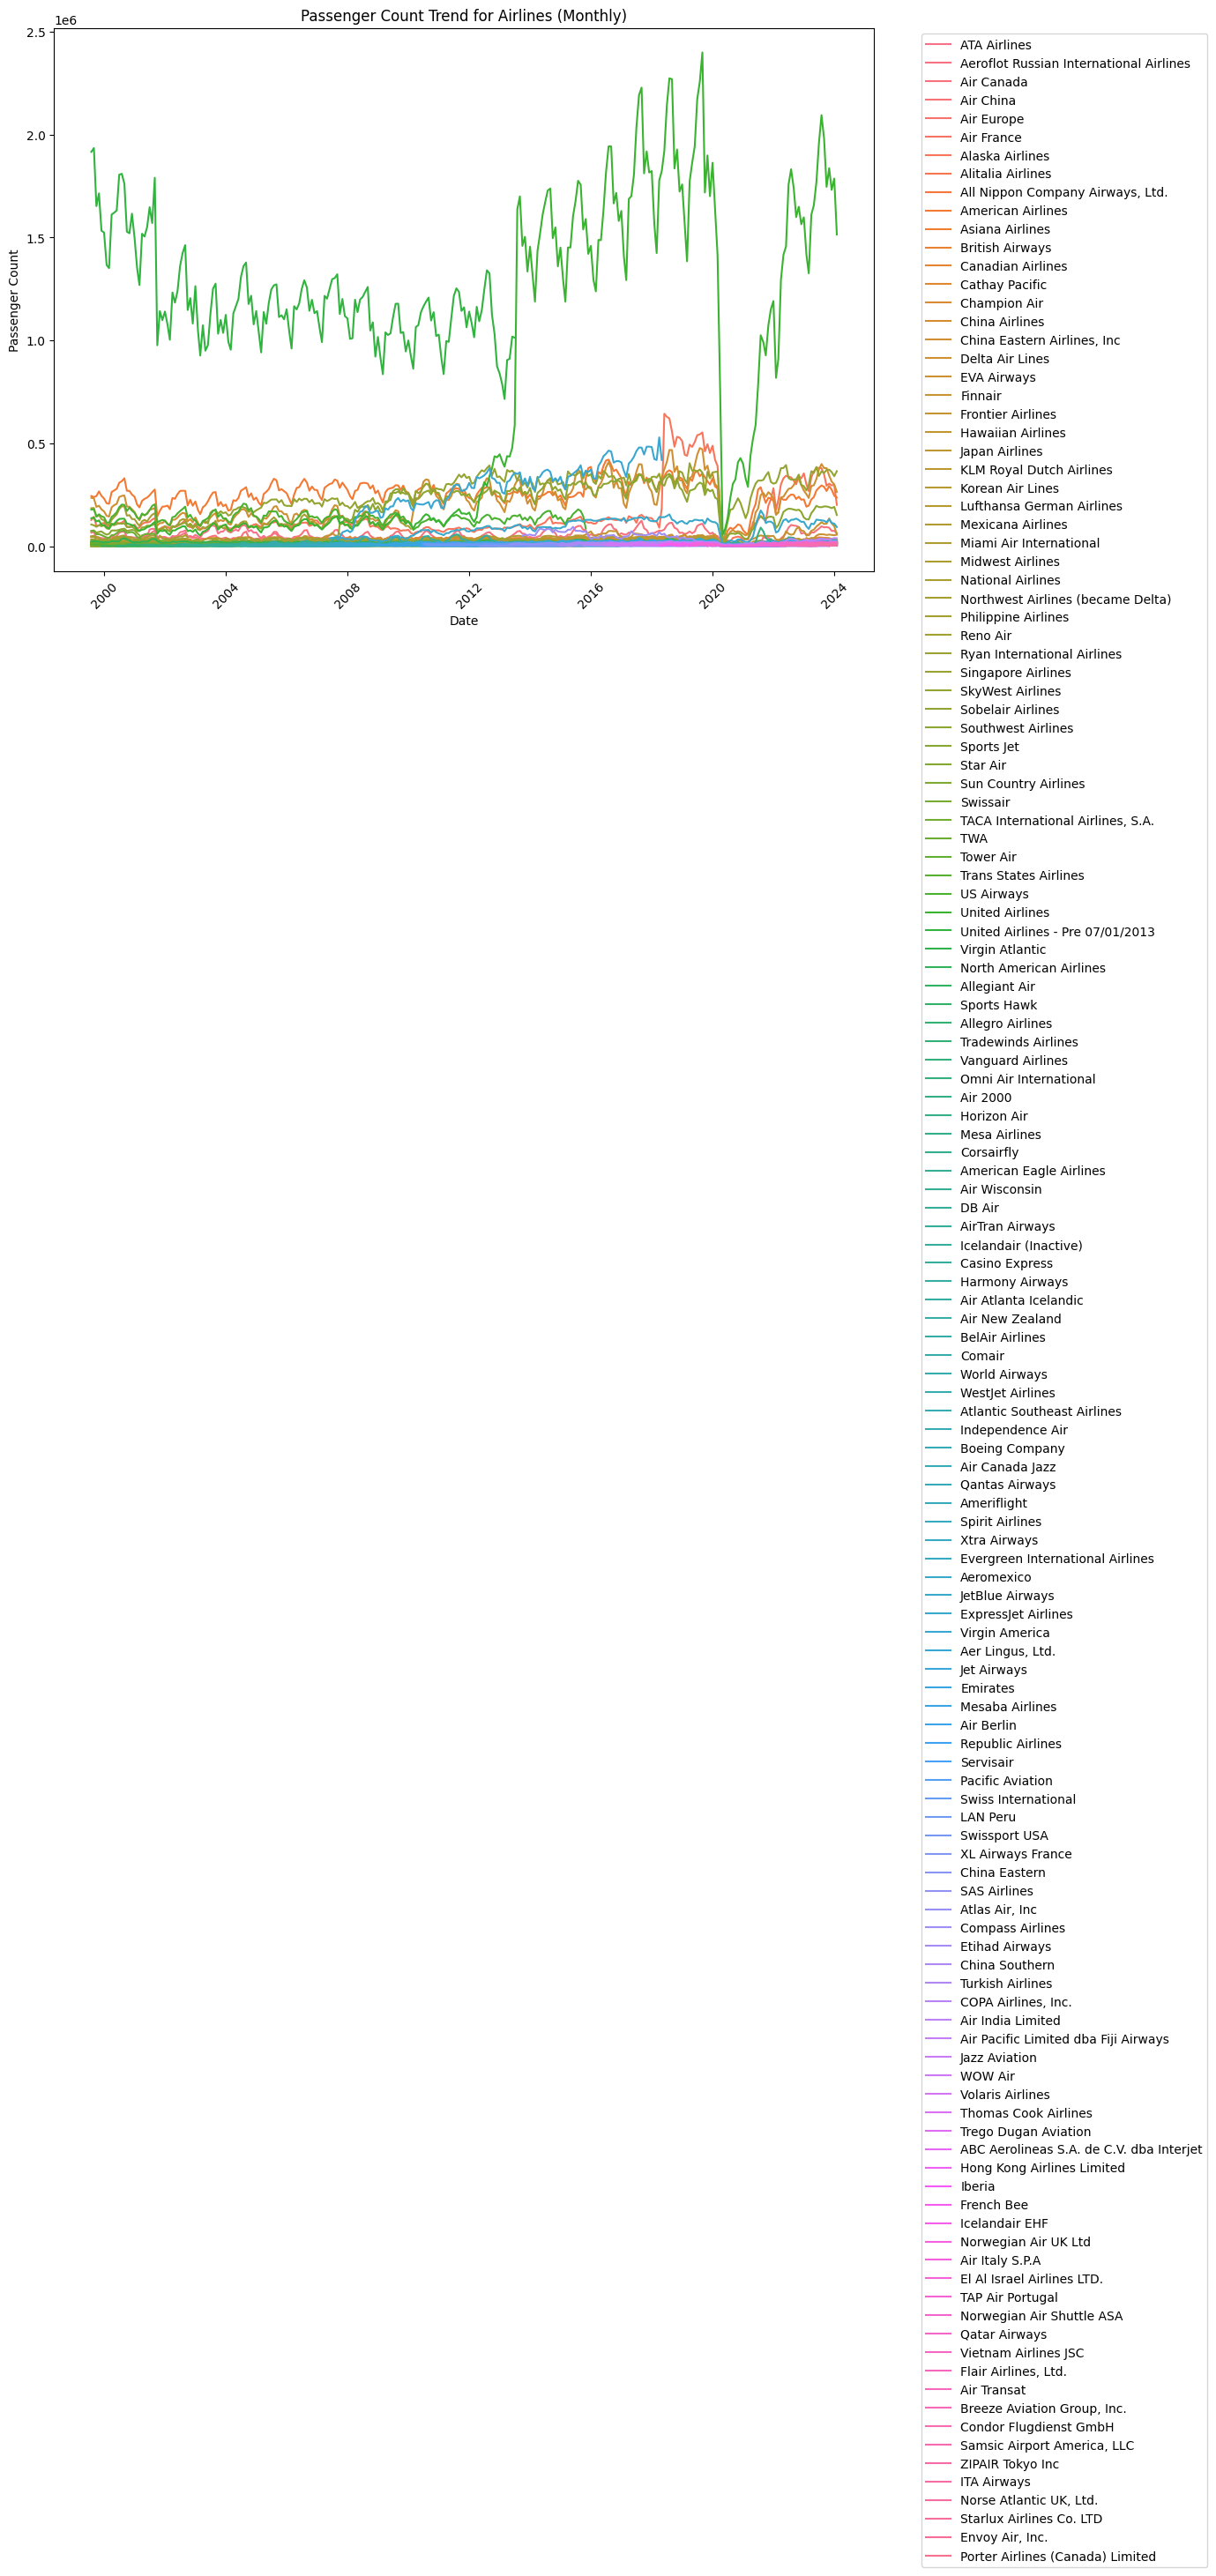

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('data/Air_Traffic_Passenger_Statistics_20240408.csv')

# Select relevant columns
airline_data = data[['Activity Period Start Date', 'Operating Airline', 'Passenger Count']]

# Convert 'Activity Period Start Date' to datetime
airline_data['Activity Period Start Date'] = pd.to_datetime(airline_data['Activity Period Start Date'])

# Group data by airline and month, summing passenger counts
airline_passenger_counts = airline_data.groupby([pd.Grouper(key='Activity Period Start Date', freq='M'), 'Operating Airline']).sum().reset_index()

# Line chart showing passenger count trend for each airline every month
plt.figure(figsize=(12, 8))
sns.lineplot(data=airline_passenger_counts, x='Activity Period Start Date', y='Passenger Count', hue='Operating Airline')
plt.title('Passenger Count Trend for Airlines (Monthly)')
plt.xlabel('Date')
plt.ylabel('Passenger Count')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


C:\Users\nerea\AppData\Local\Temp\ipykernel_14672\2362406971.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airline_data['Activity Period Start Date'] = pd.to_datetime(airline_data['Activity Period Start Date'])
C:\Users\nerea\AppData\Local\Temp\ipykernel_14672\2362406971.py:15: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  airline_passenger_counts = airline_data.groupby([pd.Grouper(key='Activity Period Start Date', freq='M'), 'Operating Airline']).sum().reset_index()


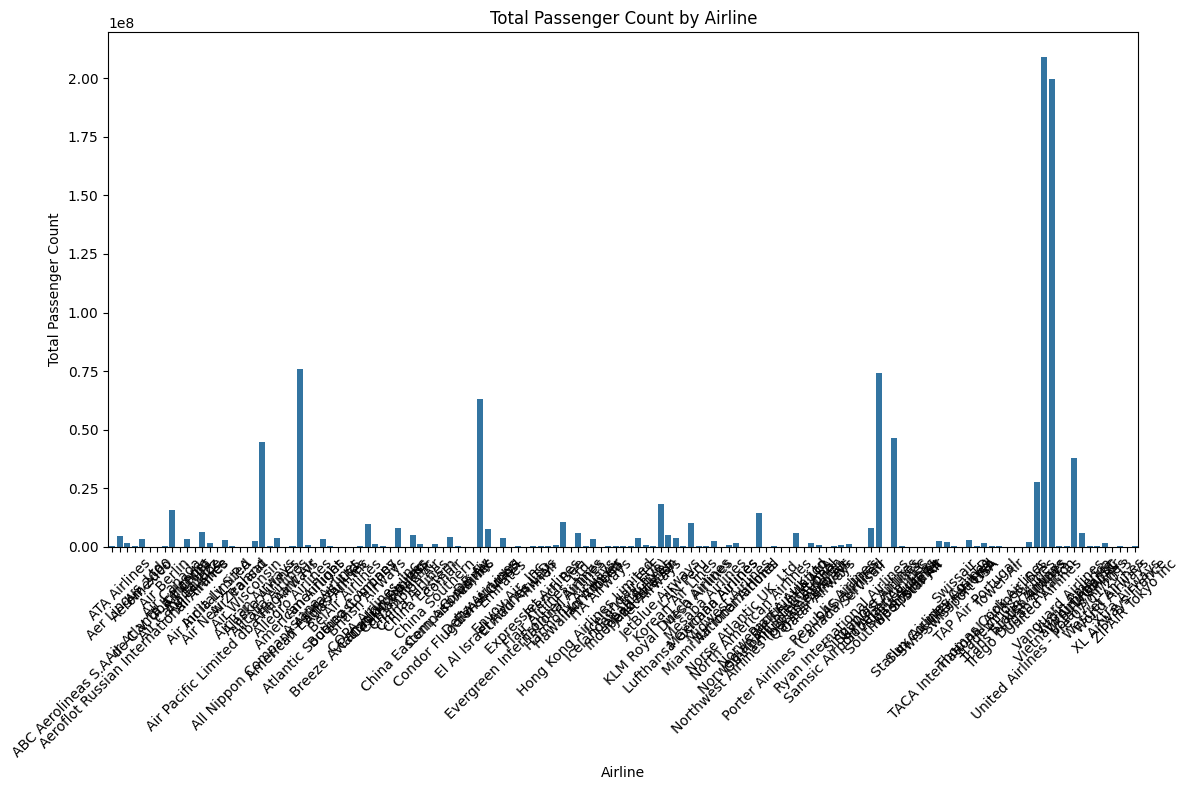

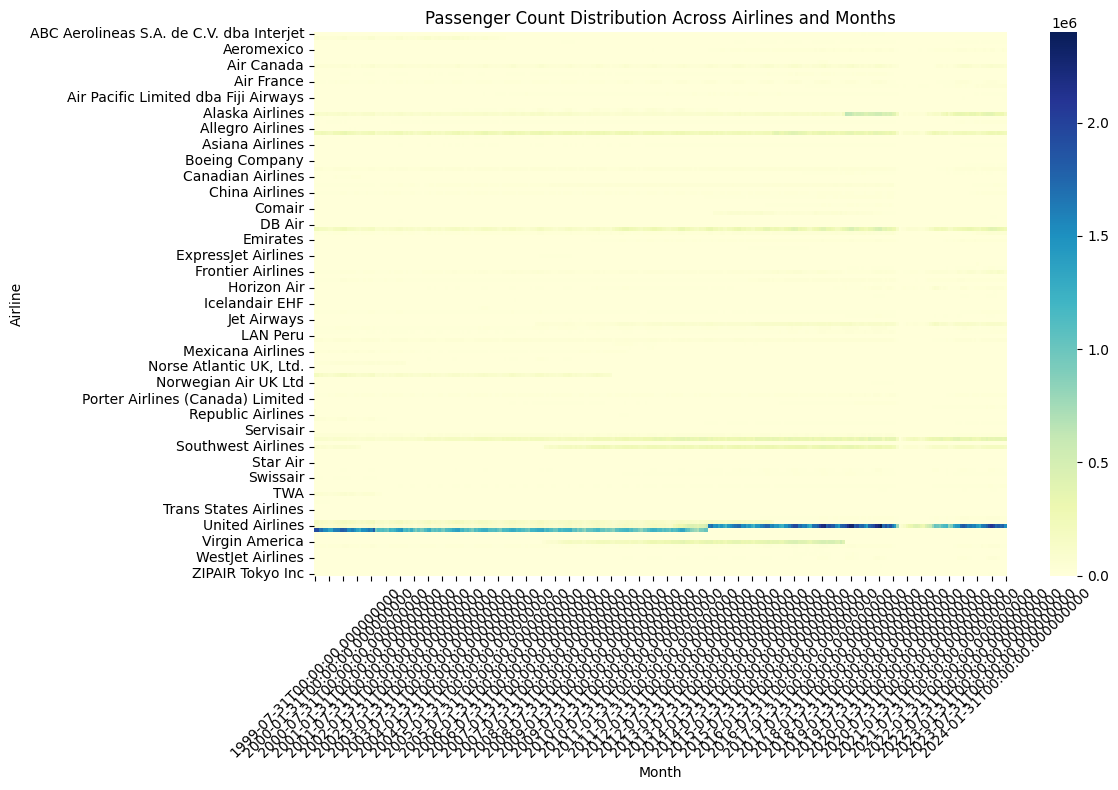

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('data/Air_Traffic_Passenger_Statistics_20240408.csv')

# Select relevant columns
airline_data = data[['Activity Period Start Date', 'Operating Airline', 'Passenger Count']]

# Convert 'Activity Period Start Date' to datetime
airline_data['Activity Period Start Date'] = pd.to_datetime(airline_data['Activity Period Start Date'])

# Group data by airline and month, summing passenger counts
airline_passenger_counts = airline_data.groupby([pd.Grouper(key='Activity Period Start Date', freq='M'), 'Operating Airline']).sum().reset_index()

# Bar plot to compare total passenger count for each airline
plt.figure(figsize=(12, 8))
total_passenger_count = airline_passenger_counts.groupby('Operating Airline')['Passenger Count'].sum().reset_index()
sns.barplot(data=total_passenger_count, x='Operating Airline', y='Passenger Count')
plt.title('Total Passenger Count by Airline')
plt.xlabel('Airline')
plt.ylabel('Total Passenger Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Heatmap to visualize passenger count distribution across airlines and months
pivot_table = airline_passenger_counts.pivot_table(index='Operating Airline', columns='Activity Period Start Date', values='Passenger Count', aggfunc='sum', fill_value=0)
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap='YlGnBu')
plt.title('Passenger Count Distribution Across Airlines and Months')
plt.xlabel('Month')
plt.ylabel('Airline')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\nerea\AppData\Local\Temp\ipykernel_14672\548082279.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airline_data['Activity Period Start Date'] = pd.to_datetime(airline_data['Activity Period Start Date'])
C:\Users\nerea\AppData\Local\Temp\ipykernel_14672\548082279.py:15: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  airline_passenger_counts = airline_data.groupby([pd.Grouper(key='Activity Period Start Date', freq='M'), 'Operating Airline']).sum().reset_index()
C:\Users\nerea\AppData\Local\Temp\ipykernel_14672\548082279.py:28: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=filtered_airline_passenger_counts, x='Operati

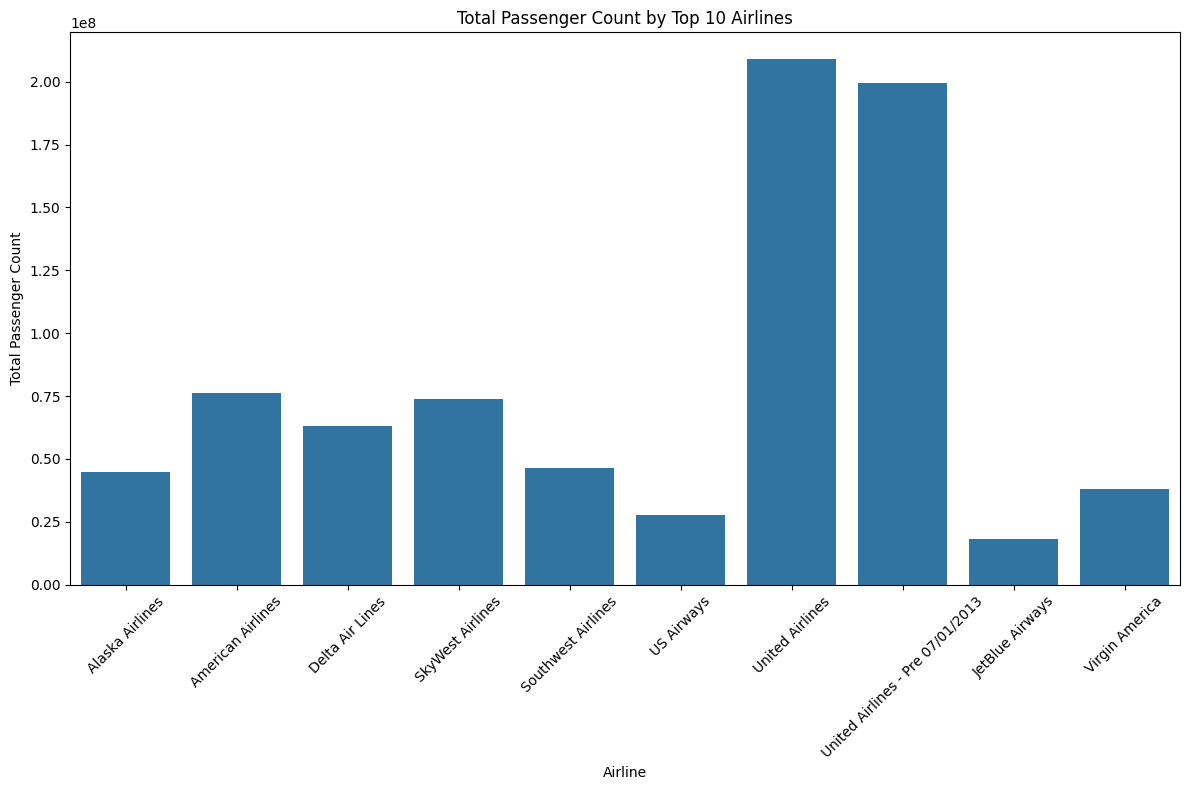

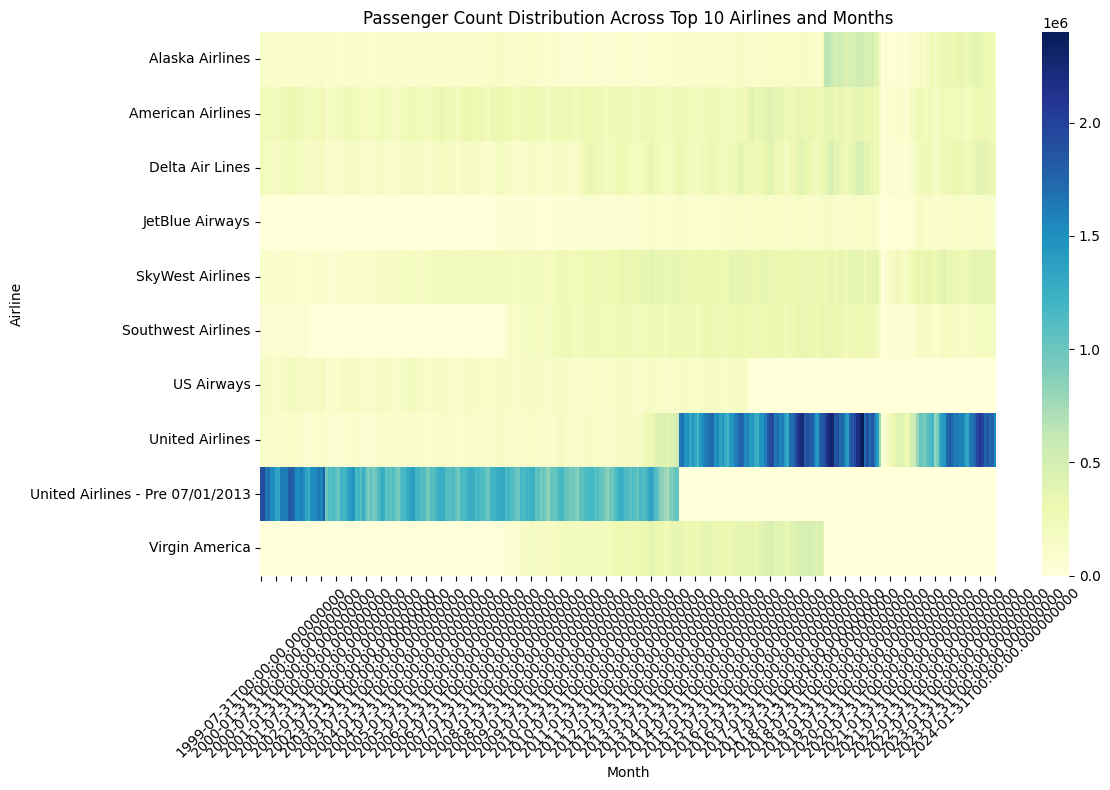

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('data/Air_Traffic_Passenger_Statistics_20240408.csv')

# Select relevant columns
airline_data = data[['Activity Period Start Date', 'Operating Airline', 'Passenger Count']]

# Convert 'Activity Period Start Date' to datetime
airline_data['Activity Period Start Date'] = pd.to_datetime(airline_data['Activity Period Start Date'])

# Group data by airline and month, summing passenger counts
airline_passenger_counts = airline_data.groupby([pd.Grouper(key='Activity Period Start Date', freq='M'), 'Operating Airline']).sum().reset_index()

# Calculate total passenger count for each airline
total_passenger_count = airline_passenger_counts.groupby('Operating Airline')['Passenger Count'].sum().reset_index()

# Filter the top 10 airlines with the highest total passenger counts
top_10_airlines = total_passenger_count.nlargest(10, 'Passenger Count')['Operating Airline']

# Filter the dataset to include only the top 10 airlines
filtered_airline_passenger_counts = airline_passenger_counts[airline_passenger_counts['Operating Airline'].isin(top_10_airlines)]

# Bar plot to compare total passenger count for each of the top 10 airlines
plt.figure(figsize=(12, 8))
sns.barplot(data=filtered_airline_passenger_counts, x='Operating Airline', y='Passenger Count', estimator=sum, ci=None)
plt.title('Total Passenger Count by Top 10 Airlines')
plt.xlabel('Airline')
plt.ylabel('Total Passenger Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Heatmap to visualize passenger count distribution across the top 10 airlines and months
pivot_table = filtered_airline_passenger_counts.pivot_table(index='Operating Airline', columns='Activity Period Start Date', values='Passenger Count', aggfunc='sum', fill_value=0)
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap='YlGnBu')
plt.title('Passenger Count Distribution Across Top 10 Airlines and Months')
plt.xlabel('Month')
plt.ylabel('Airline')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\nerea\AppData\Local\Temp\ipykernel_14672\3812758629.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airline_data['Activity Period Start Date'] = pd.to_datetime(airline_data['Activity Period Start Date'])
C:\Users\nerea\AppData\Local\Temp\ipykernel_14672\3812758629.py:15: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  airline_passenger_counts = airline_data.groupby([pd.Grouper(key='Activity Period Start Date', freq='Y'), 'Operating Airline']).sum().reset_index()


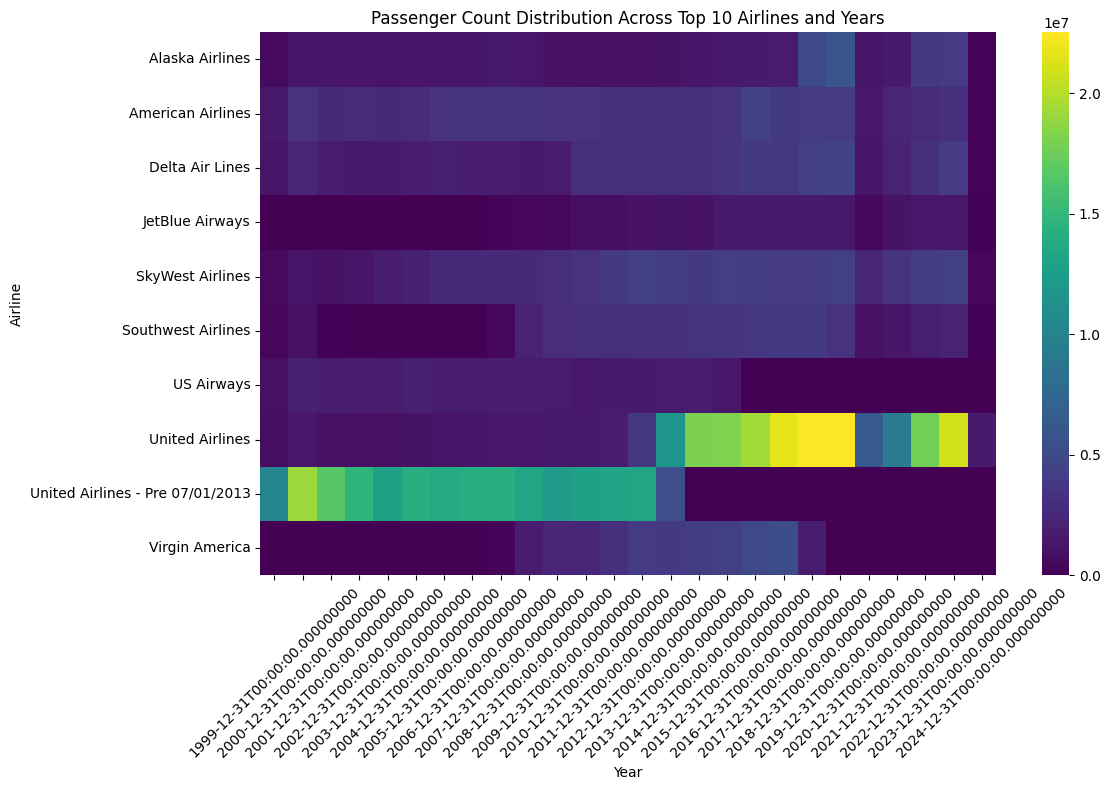

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('data/Air_Traffic_Passenger_Statistics_20240408.csv')

# Select relevant columns
airline_data = data[['Activity Period Start Date', 'Operating Airline', 'Passenger Count']]

# Convert 'Activity Period Start Date' to datetime
airline_data['Activity Period Start Date'] = pd.to_datetime(airline_data['Activity Period Start Date'])

# Group data by airline and year, summing passenger counts
airline_passenger_counts = airline_data.groupby([pd.Grouper(key='Activity Period Start Date', freq='Y'), 'Operating Airline']).sum().reset_index()

# Calculate total passenger count for each airline
total_passenger_count = airline_passenger_counts.groupby('Operating Airline')['Passenger Count'].sum().reset_index()

# Filter the top 10 airlines with the highest total passenger counts
top_10_airlines = total_passenger_count.nlargest(10, 'Passenger Count')['Operating Airline']

# Filter the dataset to include only the top 10 airlines
filtered_airline_passenger_counts = airline_passenger_counts[airline_passenger_counts['Operating Airline'].isin(top_10_airlines)]

# Pivot the data to create a matrix for the heatmap
pivot_table = filtered_airline_passenger_counts.pivot_table(index='Operating Airline', columns='Activity Period Start Date', values='Passenger Count', aggfunc='sum', fill_value=0)

# Heatmap to visualize passenger count distribution across the top 10 airlines and years
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap='viridis')
plt.title('Passenger Count Distribution Across Top 10 Airlines and Years')
plt.xlabel('Year')
plt.ylabel('Airline')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
